In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import random
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 128
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
train_17s = np.logical_or(y_train == 1, y_train == 7)
test_17s = np.logical_or(y_test == 1, y_test == 7)
x_train = x_train[train_17s]
y_train = y_train[train_17s] 
x_test = x_test[test_17s]
y_test = y_test[test_17s]

In [4]:
y_train = (y_train == 7).astype('float32')
y_test = (y_test == 7).astype('float32')

In [5]:
train_idx = np.random.choice(x_train.shape[0], 1000, replace=False)
test_idx = np.random.choice(x_test.shape[0], 2000, replace=False)

X = x_train[train_idx].reshape(-1, 28 * 28)
Y = y_train[train_idx]
test_X = x_test[test_idx].reshape(-1, 28 * 28)
test_Y = y_test[test_idx]

print('x_train shape:', X.shape)
print(X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

x_train shape: (1000, 784)
1000 train samples
2000 test samples


In [6]:
model = Sequential()
model.add(Dense(2, input_dim=28 * 28, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Y_cat = np_utils.to_categorical(Y, 2)
test_cat = np_utils.to_categorical(test_Y, 2)
model.fit(X, Y_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(test_X, test_cat))
score = model.evaluate(test_X, test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0590497000515
Test accuracy: 0.9855


In [7]:
incorrects = np.nonzero(np.argmax(model.predict(X), axis=1) != Y)
incorrects

(array([ 17,  37,  71, 100, 102, 186, 870, 942, 970]),)

array([ 0.578233  ,  0.42176697], dtype=float32)

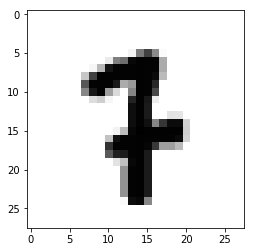

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(-X[17].reshape(28, 28), cmap='gray')
model.predict(X)[17]